In [1]:
import pandas as pd

# School Data by Suburb

In [2]:
# Trying to load the CSV file with a different encoding to handle the potential encoding issues
file_path = 'data/raw/dv346-schoollocations2023.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.66660,-38.61771
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.59039,-38.38628
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,NaN,Avoca,VIC,...,P O Box 12,NaN,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees (S),143.47565,-37.08450
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,NaN,Avenel,VIC,...,40 Anderson Street,NaN,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie (S),145.23472,-36.90137
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,NaN,Warrandyte,VIC,...,5-11 Forbes Street,NaN,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),145.21398,-37.74268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,Independent,2,2244,Plenty River College,Secondary,O,"Unit 5, 9 Danaher Drive",NaN,SOUTH MORANG,VIC,...,"Unit 5, 9 Danaher Drive",NaN,SOUTH MORANG,VIC,3752,03 9435 9060,707,Whittlesea (C),145.08148,-37.64875
2298,Catholic,2,2245,Holy Cross Catholic Primary School,Primary,O,2-14 Carlingford Rd,NaN,MICKLEHAM,VIC,...,2-14 Carlingford Rd,NaN,MICKLEHAM,VIC,3064,03 9216 4200,327,Hume (C),144.90520,-37.53046
2299,Independent,2,2246,Sidrah Gardens School,Primary,O,434-442 Belgrave-Hallam Road,NaN,NARRE WARREN NORTH,VIC,...,434-442 Belgrave-Hallam Road,NaN,NARRE WARREN NORTH,VIC,3804,03 9796 9704,161,Casey (C),145.31589,-37.97324
2300,Independent,2,2247,Mountain District Community College,Secondary,O,13-15 The Avenue,NaN,FERNTREE GULLY,VIC,...,13-15 The Avenue,NaN,FERNTREE GULLY,VIC,3156,03 9758 7859,367,Knox (C),145.29327,-37.88319


## Pre-processing

In [3]:
# Dropping columns with significant missing values
data_cleaned = data.drop(columns=['Address_Line_2', 'Postal_Address_Line_2'])

# Handling missing values in coordinates, remove rows where either X or Y is missing
#data_cleaned = data_cleaned.dropna(subset=['X', 'Y'])

# Ensure correct data types
data_cleaned['Full_Phone_No'] = data_cleaned['Full_Phone_No'].astype(str)
data_cleaned['Entity_Type'] = pd.to_numeric(data_cleaned['Entity_Type'], errors='coerce')
data_cleaned['School_No'] = pd.to_numeric(data_cleaned['School_No'], errors='coerce')
data_cleaned['Address_Postcode'] = pd.to_numeric(data_cleaned['Address_Postcode'], errors='coerce')
data_cleaned['Postal_Postcode'] = pd.to_numeric(data_cleaned['Postal_Postcode'], errors='coerce')

# Check and remove duplicates based on 'School_No'
#data_cleaned = data_cleaned.drop_duplicates(subset=['School_No'])

# Standardizing text columns (strip extra spaces and capitalize)
text_columns = ['Education_Sector', 'School_Name', 'School_Type', 'School_Status', 
                'Address_Town', 'Address_State', 'Postal_Town', 'Postal_State', 'LGA_Name']
for col in text_columns:
    data_cleaned[col] = data_cleaned[col].str.strip().str.title()

# Ensure valid ranges for coordinates and postcodes
data_cleaned = data_cleaned[(data_cleaned['X'].between(-180, 180)) & (data_cleaned['Y'].between(-90, 90))]
data_cleaned = data_cleaned[(data_cleaned['Address_Postcode'].between(1000, 9999)) & 
                            (data_cleaned['Postal_Postcode'].between(1000, 9999))]

data_cleaned

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,School_Status,Address_Line_1,Address_Town,Address_State,Address_Postcode,Postal_Address_Line_1,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,Alberton,Vic,3971,21 Thomson Street,Alberton,Vic,3971,03 5183 2412,681,Wellington (S),146.66660,-38.61771
1,Government,1,3,Allansford And District Primary School,Primary,O,Frank Street,Allansford,Vic,3277,Frank Street,Allansford,Vic,3277,03 5565 1382,673,Warrnambool (C),142.59039,-38.38628
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,Avoca,Vic,3467,P O Box 12,Avoca,Vic,3467,03 5465 3176,599,Pyrenees (S),143.47565,-37.08450
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,Avenel,Vic,3664,40 Anderson Street,Avenel,Vic,3664,03 5796 2264,643,Strathbogie (S),145.23472,-36.90137
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,Warrandyte,Vic,3113,5-11 Forbes Street,Warrandyte,Vic,3113,03 9844 3537,421,Manningham (C),145.21398,-37.74268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,Independent,2,2244,Plenty River College,Secondary,O,"Unit 5, 9 Danaher Drive",South Morang,Vic,3752,"Unit 5, 9 Danaher Drive",South Morang,Vic,3752,03 9435 9060,707,Whittlesea (C),145.08148,-37.64875
2298,Catholic,2,2245,Holy Cross Catholic Primary School,Primary,O,2-14 Carlingford Rd,Mickleham,Vic,3064,2-14 Carlingford Rd,Mickleham,Vic,3064,03 9216 4200,327,Hume (C),144.90520,-37.53046
2299,Independent,2,2246,Sidrah Gardens School,Primary,O,434-442 Belgrave-Hallam Road,Narre Warren North,Vic,3804,434-442 Belgrave-Hallam Road,Narre Warren North,Vic,3804,03 9796 9704,161,Casey (C),145.31589,-37.97324
2300,Independent,2,2247,Mountain District Community College,Secondary,O,13-15 The Avenue,Ferntree Gully,Vic,3156,13-15 The Avenue,Ferntree Gully,Vic,3156,03 9758 7859,367,Knox (C),145.29327,-37.88319


In [4]:
school_types = data_cleaned['School_Type'].unique()
school_types

array(['Primary', 'Pri/Sec', 'Special', 'Camp', 'Secondary', 'Language'],
      dtype=object)

In [5]:
# Select one row for each unique school type
sample_rows_by_school_type = data_cleaned.groupby('School_Type').first().reset_index()
sample_rows_by_school_type


,School_Type,Education_Sector,Entity_Type,School_No,School_Name,School_Status,Address_Line_1,Address_Town,Address_State,Address_Postcode,Postal_Address_Line_1,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Camp,Government,1,5181,Sovereign Hill School,O,39 Magpie Street,Ballarat,Vic,3350,Sovereign Hill Post Office,Ballarat,Vic,3350,03 5337 1143,57,Ballarat (C),143.86526,-37.57582
1,Language,Government,1,8747,Blackburn English Language School,O,120 Eley Road,Burwood East,Vic,3151,120 Eley Road,Burwood East,Vic,3151,03 9803 4022,698,Whitehorse (C),145.14829,-37.84789
2,Pri/Sec,Government,1,776,Bright P-12 College,O,46 Bakers Gully Road,Bright,Vic,3741,P O Box 30,Bright,Vic,3741,03 5755 1166,11,Alpine (S),146.96093,-36.73310
3,Primary,Government,1,1,Alberton Primary School,O,21 Thomson Street,Alberton,Vic,3971,21 Thomson Street,Alberton,Vic,3971,03 5183 2412,681,Wellington (S),146.66660,-38.61771
4,Secondary,Government,1,7028,Mount Erin Secondary College,O,43 Robinsons Road,Frankston South,Vic,3199,43 Robinsons Road,Frankston South,Vic,3199,03 5971 6000,217,Frankston (C),145.14663,-38.17412
5,Special,Government,1,2784,Montague Continuing Education Centre,O,100 Montague Street,South Melbourne,Vic,3205,100 Montague Street,South Melbourne,Vic,3205,03 9690 3535,590,Port Phillip (C),144.94974,-37.83060


In [6]:
data_cleaned['Education_Sector'].unique()

array(['Government', 'Independent', 'Catholic'], dtype=object)

In [7]:
# Calculate the count of schools by type
school_type_distribution = data_cleaned['School_Type'].value_counts()
school_type_distribution

School_Type
Primary      1576
Secondary     354
Pri/Sec       247
Special       118
Language        4
Camp            2
Name: count, dtype: int64

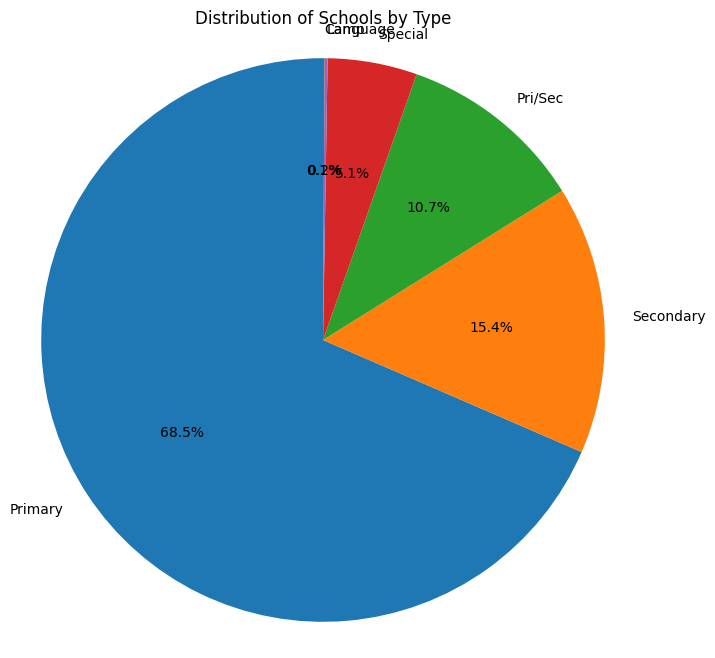

In [8]:
import matplotlib.pyplot as plt

# Plot a pie chart for the distribution of schools by type
plt.figure(figsize=(8, 8))
plt.pie(school_type_distribution, labels=school_type_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Schools by Type')
plt.axis('equal') 
plt.show()

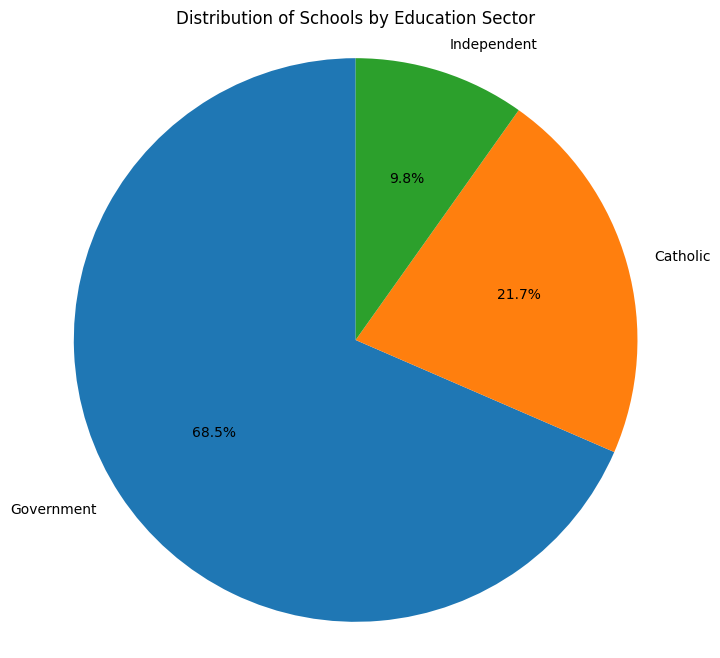

In [9]:
# Distribution of schools by Education_Sector
education_sector_distribution = data_cleaned['Education_Sector'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(education_sector_distribution, labels=education_sector_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Schools by Education Sector')
plt.axis('equal')  
plt.show()


## Aggregate data

In [10]:
# Get the following as features
primary_condition = (data_cleaned['School_Type'] == 'Primary') | (data_cleaned['School_Type'] == 'Pri/Sec')
secondary_public_condition = ((data_cleaned['School_Type'] == 'Secondary') | (data_cleaned['School_Type'] == 'Pri/Sec')) & (data_cleaned['Education_Sector'] == 'Government')
secondary_private_condition = ((data_cleaned['School_Type'] == 'Secondary') | (data_cleaned['School_Type'] == 'Pri/Sec')) & (data_cleaned['Education_Sector'] == 'Independent')
secondary_catholic_condition = ((data_cleaned['School_Type'] == 'Secondary') | (data_cleaned['School_Type'] == 'Pri/Sec')) & (data_cleaned['Education_Sector'] == 'Catholic')
special_condition = (data_cleaned['School_Type'] == 'Special')

# Aggregate by suburb
suburb_aggregated = data_cleaned.groupby('Address_Town').agg(
    num_primary=('School_Type', lambda x: primary_condition.loc[x.index].sum()),
    num_secondary_public=('School_Type', lambda x: secondary_public_condition.loc[x.index].sum()),
    num_secondary_private=('School_Type', lambda x: secondary_private_condition.loc[x.index].sum()),
    num_secondary_catholic=('School_Type', lambda x: secondary_catholic_condition.loc[x.index].sum()),
    num_special=('School_Type', lambda x: special_condition.loc[x.index].sum())
).reset_index()

suburb_aggregated

,Address_Town,num_primary,num_secondary_public,num_secondary_private,num_secondary_catholic,num_special
0,Abbotsford,2,0,1,0,0
1,Aberfeldie,1,0,0,1,0
2,Aintree,1,0,0,0,0
3,Aireys Inlet,1,0,0,0,0
4,Airly,1,0,0,0,0
...,...,...,...,...,...,...
950,Yea,2,1,0,0,0
951,Yering,1,0,0,0,0
952,Yinnar,1,0,0,0,0
953,Yinnar South,1,0,0,0,0


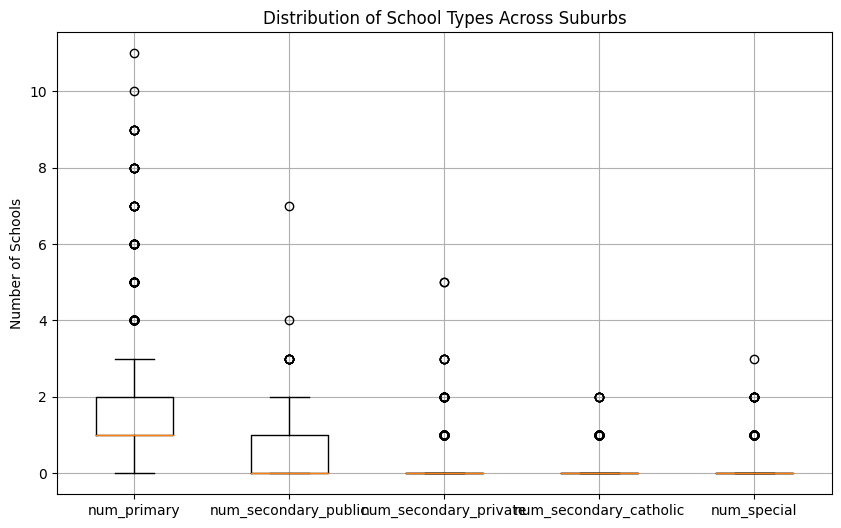

num_primary               1.908901
num_secondary_public      0.351832
num_secondary_private     0.175916
num_secondary_catholic    0.101571
num_special               0.123560
dtype: float64

In [11]:
# Distribution of the number of schools by type across suburbs
boxplot_data = suburb_aggregated[['num_primary', 'num_secondary_public', 'num_secondary_private', 'num_secondary_catholic', 'num_special']]
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data.values, labels=boxplot_data.columns)
plt.title('Distribution of School Types Across Suburbs')
plt.ylabel('Number of Schools')
plt.grid(True)
plt.show()

# Calculate the average number of schools per category in suburbs
avg_schools_per_category = boxplot_data.mean()
avg_schools_per_category


In [12]:
suburb_aggregated.to_csv("data/curated/schools_by_suburb.csv")

# House Data

In [13]:
school_df = suburb_aggregated # may need to change code to read school_df
school_df.head()

,Address_Town,num_primary,num_secondary_public,num_secondary_private,num_secondary_catholic,num_special
0,Abbotsford,2,0,1,0,0
1,Aberfeldie,1,0,0,1,0
2,Aintree,1,0,0,0,0
3,Aireys Inlet,1,0,0,0,0
4,Airly,1,0,0,0,0


In [14]:
# Load data
file_path = 'data/curated/preprocessing_houseprices_trainstations.csv'
house_df = pd.read_csv(file_path)
house_df

,Unnamed: 0,unique_id,postcode,suburb,property_type,address,rent,num_bedrooms,num_bathrooms,parking,distance_to_cbd,Listing date,latitude,longitude,geometry,index_right,STOP_NAME,distance
0,0,321642316,3806.0,berwick,house,"4 Foulds Court, Berwick VIC 3806",400.0,4.0,2.0,1.0,40.38,Dec 2017,-38.031315,145.331540,POINT (353570.9464978391 5789396.778679742),133.0,Berwick Railway Station (Berwick),1.602284
1,1,321928446,3806.0,berwick,house,"123 Bellevue Drive, Berwick VIC 3806",475.0,4.0,2.0,2.0,41.05,Nov 2017,-38.045784,145.326920,POINT (353194.3506641715 5787783.949182441),133.0,Berwick Railway Station (Berwick),1.756095
2,2,321970813,3147.0,ashburton,house,"Address available on request, Ashburton VIC 3147",399.0,3.0,1.0,1.0,14488.47,Aug 2017,0.000000,0.000000,POINT (-3395506.464874165 29995929.886041995),75.0,Sunbury Railway Station (Sunbury),24438.395827
3,3,32166664,3163.0,carnegie,apartment,"4/20 Emily Street, Carnegie VIC 3163",255.0,1.0,1.0,1.0,12.44,Aug 2013,-37.891478,145.064859,POINT (329841.699752674 5804460.411152649),169.0,Murrumbeena Railway Station (Murrumbeena),0.264221
4,4,32293871,3764.0,kilmore,unit,"7/2 Lumsden Street, Kilmore VIC 3764",230.0,2.0,1.0,1.0,56.90,Jan 2013,-37.301973,144.948512,POINT (318180.62964953156 5869654.839862136),65.0,Craigieburn Railway Station (Craigieburn),33.280452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756521,756521,311970050,3011.0,footscray,apartment,"13/7 Eldridge Street, Footscray VIC 3011",300.0,2.0,1.0,1.0,6.74,Aug 2016,-37.790220,144.892290,POINT (314412.26819505205 5815367.821684135),47.0,Middle Footscray Railway Station (Footscray),1.363989
756522,756522,311970062,3840.0,hazelwood north,house,"91 Warren Terrace, Hazelwood North VIC 3840",525.0,4.0,2.0,5.0,143.95,Oct 2016,-38.281055,146.496220,POINT (455938.66767291067 5762880.58886958),130.0,Pakenham Railway Station (Pakenham),91.205401
756523,756523,311970067,3032.0,maribyrnong,house,"42 Magazine Way, Maribyrnong VIC 3032",775.0,4.0,3.0,2.0,6.57,Jun 2016,-37.784313,144.898130,POINT (314911.80854246946 5816034.884742471),48.0,Footscray Railway Station (Footscray),1.912880
756524,756524,311970074,3141.0,south yarra,house,"3 Caroline Street South, South Yarra VIC 3141",500.0,3.0,1.0,2.0,3.66,Dec 2016,-37.840320,144.987380,POINT (322905.7846469923 5809993.018954083),209.0,South Yarra Railway Station (South Yarra),0.484738


In [15]:
# lowercase to aggregate data
school_df = school_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
school_df

,Address_Town,num_primary,num_secondary_public,num_secondary_private,num_secondary_catholic,num_special
0,abbotsford,2,0,1,0,0
1,aberfeldie,1,0,0,1,0
2,aintree,1,0,0,0,0
3,aireys inlet,1,0,0,0,0
4,airly,1,0,0,0,0
...,...,...,...,...,...,...
950,yea,2,1,0,0,0
951,yering,1,0,0,0,0
952,yinnar,1,0,0,0,0
953,yinnar south,1,0,0,0,0


In [16]:
# Merge house data with the suburb-aggregated school data
# Use a left join to ensure all rows in house_data are retained even if a match is not found in school data
house_data_with_schools = pd.merge(
    house_df, 
    school_df, 
    how='left', 
    left_on='suburb', 
    right_on='Address_Town'
)

# Drop the redundant 'Address_Town' column
house_data_with_schools = house_data_with_schools.drop(columns=['Address_Town'])
house_data_with_schools

,Unnamed: 0,unique_id,postcode,suburb,property_type,address,rent,num_bedrooms,num_bathrooms,parking,...,longitude,geometry,index_right,STOP_NAME,distance,num_primary,num_secondary_public,num_secondary_private,num_secondary_catholic,num_special
0,0,321642316,3806.0,berwick,house,"4 Foulds Court, Berwick VIC 3806",400.0,4.0,2.0,1.0,...,145.331540,POINT (353570.9464978391 5789396.778679742),133.0,Berwick Railway Station (Berwick),1.602284,9.0,4.0,1.0,0.0,0.0
1,1,321928446,3806.0,berwick,house,"123 Bellevue Drive, Berwick VIC 3806",475.0,4.0,2.0,2.0,...,145.326920,POINT (353194.3506641715 5787783.949182441),133.0,Berwick Railway Station (Berwick),1.756095,9.0,4.0,1.0,0.0,0.0
2,2,321970813,3147.0,ashburton,house,"Address available on request, Ashburton VIC 3147",399.0,3.0,1.0,1.0,...,0.000000,POINT (-3395506.464874165 29995929.886041995),75.0,Sunbury Railway Station (Sunbury),24438.395827,3.0,0.0,0.0,0.0,0.0
3,3,32166664,3163.0,carnegie,apartment,"4/20 Emily Street, Carnegie VIC 3163",255.0,1.0,1.0,1.0,...,145.064859,POINT (329841.699752674 5804460.411152649),169.0,Murrumbeena Railway Station (Murrumbeena),0.264221,1.0,0.0,0.0,0.0,0.0
4,4,32293871,3764.0,kilmore,unit,"7/2 Lumsden Street, Kilmore VIC 3764",230.0,2.0,1.0,1.0,...,144.948512,POINT (318180.62964953156 5869654.839862136),65.0,Craigieburn Railway Station (Craigieburn),33.280452,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756521,756521,311970050,3011.0,footscray,apartment,"13/7 Eldridge Street, Footscray VIC 3011",300.0,2.0,1.0,1.0,...,144.892290,POINT (314412.26819505205 5815367.821684135),47.0,Middle Footscray Railway Station (Footscray),1.363989,5.0,1.0,0.0,0.0,0.0
756522,756522,311970062,3840.0,hazelwood north,house,"91 Warren Terrace, Hazelwood North VIC 3840",525.0,4.0,2.0,5.0,...,146.496220,POINT (455938.66767291067 5762880.58886958),130.0,Pakenham Railway Station (Pakenham),91.205401,1.0,0.0,0.0,0.0,0.0
756523,756523,311970067,3032.0,maribyrnong,house,"42 Magazine Way, Maribyrnong VIC 3032",775.0,4.0,3.0,2.0,...,144.898130,POINT (314911.80854246946 5816034.884742471),48.0,Footscray Railway Station (Footscray),1.912880,1.0,1.0,0.0,0.0,0.0
756524,756524,311970074,3141.0,south yarra,house,"3 Caroline Street South, South Yarra VIC 3141",500.0,3.0,1.0,2.0,...,144.987380,POINT (322905.7846469923 5809993.018954083),209.0,South Yarra Railway Station (South Yarra),0.484738,3.0,2.0,1.0,0.0,1.0


In [17]:
house_data_with_schools[house_data_with_schools.isna().any(axis=1)].head() # checked no school in towong etc.

,Unnamed: 0,unique_id,postcode,suburb,property_type,address,rent,num_bedrooms,num_bathrooms,parking,...,longitude,geometry,index_right,STOP_NAME,distance,num_primary,num_secondary_public,num_secondary_private,num_secondary_catholic,num_special
5,5,321960102,3707.0,towong,house,"12755 Murray River Road, Towong VIC 3707",320.0,3.0,1.0,2.0,...,147.97340,POINT (587571.7071494003 5999636.435464416),126.0,Lilydale Railway Station (Lilydale),294.289300,NaN,NaN,NaN,NaN,NaN
31,31,321750067,3228.0,jan juc,house,"61 Domain Road, Jan Juc VIC 3228",380.0,3.0,1.0,2.0,...,144.33083,POINT (265990.32051430654 5778399.301382042),171.0,Werribee Railway Station (Werribee),37.399952,NaN,NaN,NaN,NaN,NaN
35,35,321663722,3556.0,sebastian,house,"8 Luka Court, Sebastian VIC 3556",315.0,3.0,2.0,2.0,...,144.18584,POINT (248254.41260933183 5946415.520423872),75.0,Sunbury Railway Station (Sunbury),119.424792,NaN,NaN,NaN,NaN,NaN
49,49,321669458,3015.0,south kingsville,house,"67A Watt Street, South Kingsville VIC 3015",360.0,2.0,1.0,1.0,...,144.87376,POINT (312885.9808107626 5810695.740563642),22.0,Spotswood Railway Station (Spotswood),1.082824,NaN,NaN,NaN,NaN,NaN
68,68,321608508,3043.0,gowanbrae,house,"6 Clover Court, Gowanbrae VIC 3043",440.0,3.0,2.0,2.0,...,144.89465,POINT (314407.3734046217 5824824.611013841),52.0,Glenroy Railway Station (Glenroy),1.991682,NaN,NaN,NaN,NaN,NaN


In [18]:
# Fill missing school data with 0 for suburbs that did not match
house_data_with_schools[['num_primary', 'num_secondary_public', 'num_secondary_private', 'num_secondary_catholic', 'num_special']] = house_data_with_schools[
    ['num_primary', 'num_secondary_public', 'num_secondary_private', 'num_secondary_catholic', 'num_special']
].fillna(0)

In [19]:
house_data_with_schools

,Unnamed: 0,unique_id,postcode,suburb,property_type,address,rent,num_bedrooms,num_bathrooms,parking,...,longitude,geometry,index_right,STOP_NAME,distance,num_primary,num_secondary_public,num_secondary_private,num_secondary_catholic,num_special
0,0,321642316,3806.0,berwick,house,"4 Foulds Court, Berwick VIC 3806",400.0,4.0,2.0,1.0,...,145.331540,POINT (353570.9464978391 5789396.778679742),133.0,Berwick Railway Station (Berwick),1.602284,9.0,4.0,1.0,0.0,0.0
1,1,321928446,3806.0,berwick,house,"123 Bellevue Drive, Berwick VIC 3806",475.0,4.0,2.0,2.0,...,145.326920,POINT (353194.3506641715 5787783.949182441),133.0,Berwick Railway Station (Berwick),1.756095,9.0,4.0,1.0,0.0,0.0
2,2,321970813,3147.0,ashburton,house,"Address available on request, Ashburton VIC 3147",399.0,3.0,1.0,1.0,...,0.000000,POINT (-3395506.464874165 29995929.886041995),75.0,Sunbury Railway Station (Sunbury),24438.395827,3.0,0.0,0.0,0.0,0.0
3,3,32166664,3163.0,carnegie,apartment,"4/20 Emily Street, Carnegie VIC 3163",255.0,1.0,1.0,1.0,...,145.064859,POINT (329841.699752674 5804460.411152649),169.0,Murrumbeena Railway Station (Murrumbeena),0.264221,1.0,0.0,0.0,0.0,0.0
4,4,32293871,3764.0,kilmore,unit,"7/2 Lumsden Street, Kilmore VIC 3764",230.0,2.0,1.0,1.0,...,144.948512,POINT (318180.62964953156 5869654.839862136),65.0,Craigieburn Railway Station (Craigieburn),33.280452,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756521,756521,311970050,3011.0,footscray,apartment,"13/7 Eldridge Street, Footscray VIC 3011",300.0,2.0,1.0,1.0,...,144.892290,POINT (314412.26819505205 5815367.821684135),47.0,Middle Footscray Railway Station (Footscray),1.363989,5.0,1.0,0.0,0.0,0.0
756522,756522,311970062,3840.0,hazelwood north,house,"91 Warren Terrace, Hazelwood North VIC 3840",525.0,4.0,2.0,5.0,...,146.496220,POINT (455938.66767291067 5762880.58886958),130.0,Pakenham Railway Station (Pakenham),91.205401,1.0,0.0,0.0,0.0,0.0
756523,756523,311970067,3032.0,maribyrnong,house,"42 Magazine Way, Maribyrnong VIC 3032",775.0,4.0,3.0,2.0,...,144.898130,POINT (314911.80854246946 5816034.884742471),48.0,Footscray Railway Station (Footscray),1.912880,1.0,1.0,0.0,0.0,0.0
756524,756524,311970074,3141.0,south yarra,house,"3 Caroline Street South, South Yarra VIC 3141",500.0,3.0,1.0,2.0,...,144.987380,POINT (322905.7846469923 5809993.018954083),209.0,South Yarra Railway Station (South Yarra),0.484738,3.0,2.0,1.0,0.0,1.0


In [20]:
house_data_with_schools[house_data_with_schools.isna().any(axis=1)]

,Unnamed: 0,unique_id,postcode,suburb,property_type,address,rent,num_bedrooms,num_bathrooms,parking,...,longitude,geometry,index_right,STOP_NAME,distance,num_primary,num_secondary_public,num_secondary_private,num_secondary_catholic,num_special
569399,569399,311981961,3564.0,echuca,house,"4 Bennett Court, Echuca VIC 3564",300.0,3.0,2.0,2.0,...,200.0,POINT (Infinity Infinity),NaN,NaN,NaN,5.0,1.0,1.0,1.0,1.0
711666,711666,311611781,3029.0,hoppers crossing,house,"32 Sier Avenue, Hoppers Crossing VIC 3029",310.0,3.0,2.0,1.0,...,200.0,POINT (Infinity Infinity),NaN,NaN,NaN,7.0,3.0,0.0,0.0,1.0


In [21]:
#house_data_with_schools.to_csv("data/curated/pp_houseprice_trainschool_v1.csv")

# Further Pre-Processing for EDA

In [22]:
df_house_lite = house_data_with_schools.drop(columns=['Unnamed: 0', 'address', 'postcode', 'STOP_NAME', 'index_right'])
df_house_lite.rename(columns={'distance': 'nearst_train_station_dist', 'num_special': 'num_edu_centre'}, inplace=True)
df_house_lite.head()


,unique_id,suburb,property_type,rent,num_bedrooms,num_bathrooms,parking,distance_to_cbd,Listing date,latitude,longitude,geometry,nearst_train_station_dist,num_primary,num_secondary_public,num_secondary_private,num_secondary_catholic,num_edu_centre
0,321642316,berwick,house,400.0,4.0,2.0,1.0,40.38,Dec 2017,-38.031315,145.331540,POINT (353570.9464978391 5789396.778679742),1.602284,9.0,4.0,1.0,0.0,0.0
1,321928446,berwick,house,475.0,4.0,2.0,2.0,41.05,Nov 2017,-38.045784,145.326920,POINT (353194.3506641715 5787783.949182441),1.756095,9.0,4.0,1.0,0.0,0.0
2,321970813,ashburton,house,399.0,3.0,1.0,1.0,14488.47,Aug 2017,0.000000,0.000000,POINT (-3395506.464874165 29995929.886041995),24438.395827,3.0,0.0,0.0,0.0,0.0
3,32166664,carnegie,apartment,255.0,1.0,1.0,1.0,12.44,Aug 2013,-37.891478,145.064859,POINT (329841.699752674 5804460.411152649),0.264221,1.0,0.0,0.0,0.0,0.0
4,32293871,kilmore,unit,230.0,2.0,1.0,1.0,56.90,Jan 2013,-37.301973,144.948512,POINT (318180.62964953156 5869654.839862136),33.280452,2.0,0.0,0.0,1.0,0.0


In [23]:
df_house_lite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756526 entries, 0 to 756525
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   unique_id                  756526 non-null  int64  
 1   suburb                     756526 non-null  object 
 2   property_type              756526 non-null  object 
 3   rent                       756526 non-null  float64
 4   num_bedrooms               756526 non-null  float64
 5   num_bathrooms              756526 non-null  float64
 6   parking                    756526 non-null  float64
 7   distance_to_cbd            756526 non-null  float64
 8   Listing date               756526 non-null  object 
 9   latitude                   756526 non-null  float64
 10  longitude                  756526 non-null  float64
 11  geometry                   756526 non-null  object 
 12  nearst_train_station_dist  756524 non-null  float64
 13  num_primary                75

In [25]:
# Preprocessing 
# Ddatetime format
df_house_lite['Listing date'] = pd.to_datetime(df_house_lite['Listing date'], format='%b %Y')
df_house_lite.head()

,unique_id,suburb,property_type,rent,num_bedrooms,num_bathrooms,parking,distance_to_cbd,Listing date,latitude,longitude,geometry,nearst_train_station_dist,num_primary,num_secondary_public,num_secondary_private,num_secondary_catholic,num_edu_centre
0,321642316,berwick,house,400.0,4.0,2.0,1.0,40.38,2017-12-01,-38.031315,145.331540,POINT (353570.9464978391 5789396.778679742),1.602284,9.0,4.0,1.0,0.0,0.0
1,321928446,berwick,house,475.0,4.0,2.0,2.0,41.05,2017-11-01,-38.045784,145.326920,POINT (353194.3506641715 5787783.949182441),1.756095,9.0,4.0,1.0,0.0,0.0
2,321970813,ashburton,house,399.0,3.0,1.0,1.0,14488.47,2017-08-01,0.000000,0.000000,POINT (-3395506.464874165 29995929.886041995),24438.395827,3.0,0.0,0.0,0.0,0.0
3,32166664,carnegie,apartment,255.0,1.0,1.0,1.0,12.44,2013-08-01,-37.891478,145.064859,POINT (329841.699752674 5804460.411152649),0.264221,1.0,0.0,0.0,0.0,0.0
4,32293871,kilmore,unit,230.0,2.0,1.0,1.0,56.90,2013-01-01,-37.301973,144.948512,POINT (318180.62964953156 5869654.839862136),33.280452,2.0,0.0,0.0,1.0,0.0


In [24]:
df_house_lite.to_csv("data/curated/pp_houseprice_trainschool.csv")

## EDA

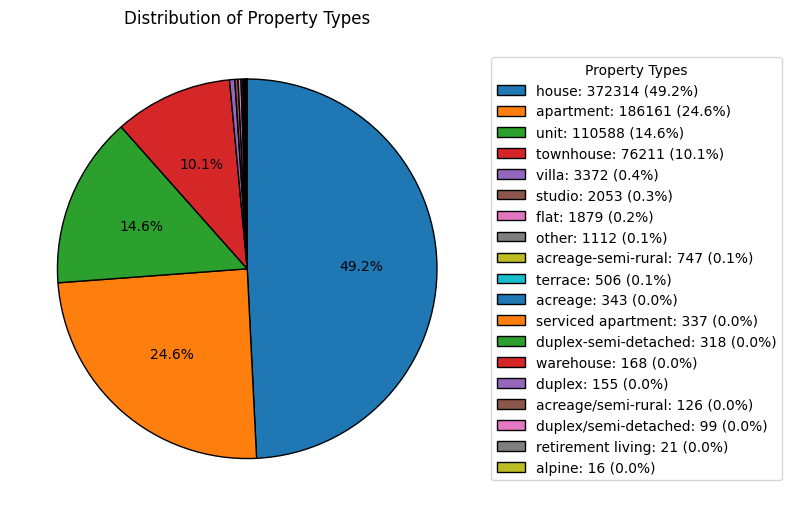

In [26]:
''' Following Pie Chart code modified from ChatGPT, OpenAI '''
# Visualize the distribution of property types
property_type_counts = df_house_lite['property_type'].value_counts()

# Function to label slices with percentages only if they are greater than 10%
def autopct_large_only(pct):
    return f'{pct:.1f}%' if pct >= 10 else ''

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    property_type_counts,
    autopct=autopct_large_only,
    startangle=90,
    counterclock=False,
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'}
)

# Create a legend to show the property type and percentage for all categories
plt.legend(
    wedges,
    [f'{label}: {count} ({pct:.1f}%)' for label, count, pct in zip(property_type_counts.index, property_type_counts, 100 * property_type_counts / property_type_counts.sum())],
    title="Property Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Distribution of Property Types')
plt.tight_layout()
plt.show()


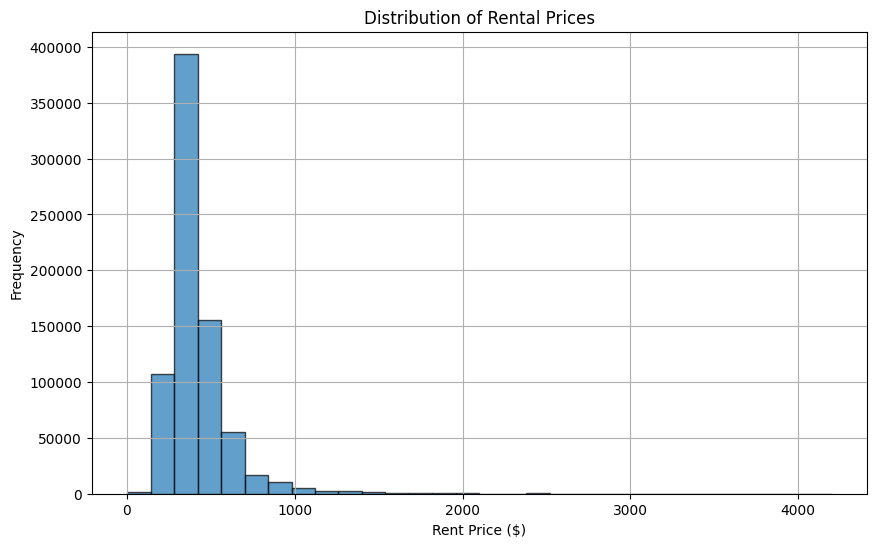

In [36]:
import matplotlib.pyplot as plt

# Plotting the distribution of rental prices
plt.figure(figsize=(10, 6))
plt.hist(df_house_lite['rent'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Rental Prices')
plt.xlabel('Rent Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

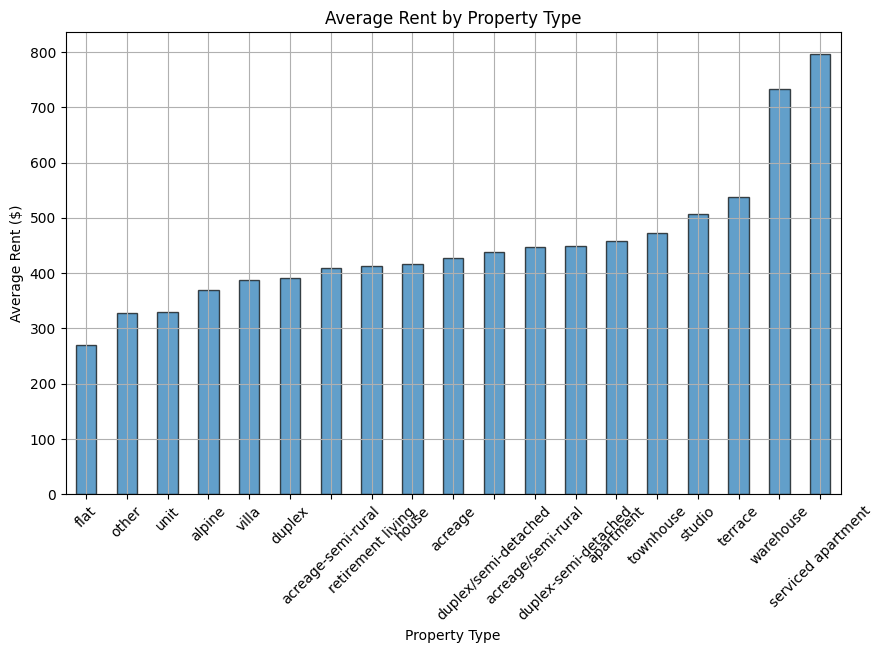

In [38]:
# Grouping by property type and calculating the average rent
rent_by_property_type = df_house_lite.groupby('property_type')['rent'].mean().sort_values()

# Plotting rent by property type
plt.figure(figsize=(10, 6))
rent_by_property_type.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Average Rent by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Rent ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


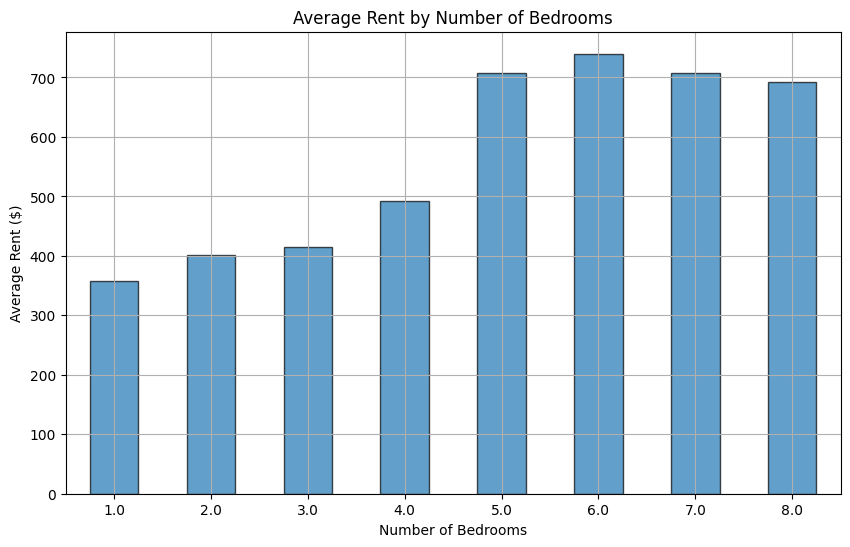

In [39]:
# Grouping by number of bedrooms and calculating the average rent
rent_by_bedrooms = df_house_lite.groupby('num_bedrooms')['rent'].mean().sort_index()

# Plotting rent by number of bedrooms
plt.figure(figsize=(10, 6))
rent_by_bedrooms.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Average Rent by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent ($)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


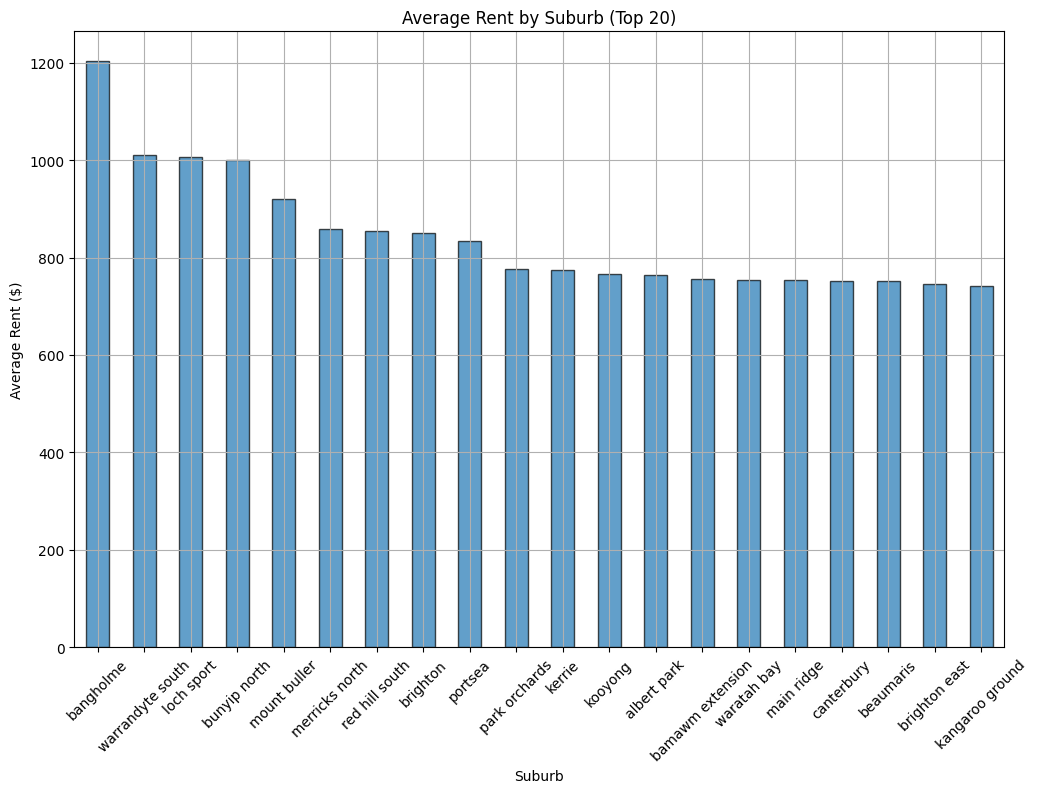

In [40]:
# Grouping by suburb and calculating the average rent
rent_by_suburb = df_house_lite.groupby('suburb')['rent'].mean().sort_values(ascending=False)

# Plotting the top 20 suburbs with the highest average rent
plt.figure(figsize=(12, 8))
rent_by_suburb.head(20).plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Average Rent by Suburb (Top 20)')
plt.xlabel('Suburb')
plt.ylabel('Average Rent ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


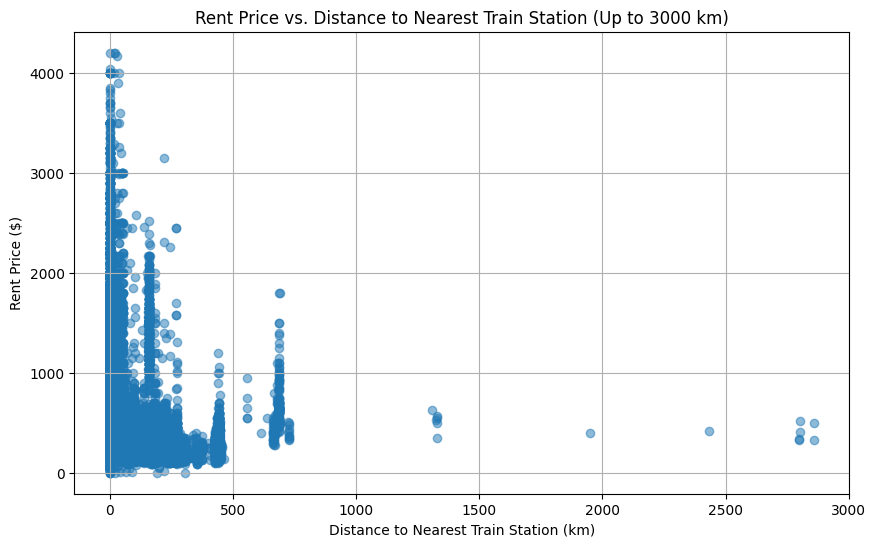

In [42]:
# Filter data to show only properties where the distance to the nearest train station is up to 3000 km
filtered_data = df_house_lite[df_house_lite['nearst_train_station_dist'] <= 3000]

# Scatter plot for rent vs. train station distance (up to 3000 km)
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['nearst_train_station_dist'], filtered_data['rent'], alpha=0.5)
plt.title('Rent Price vs. Distance to Nearest Train Station (Up to 3000 km)')
plt.xlabel('Distance to Nearest Train Station (km)')
plt.ylabel('Rent Price ($)')
plt.grid(True)
plt.show()


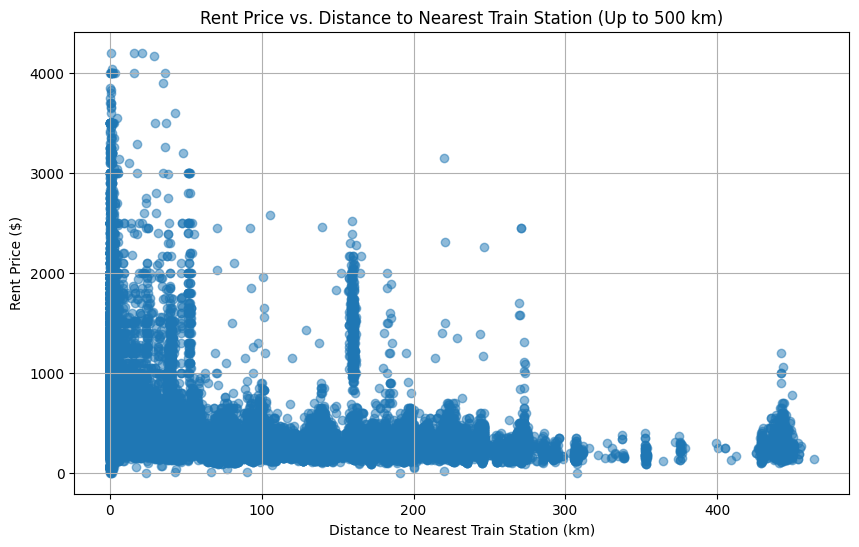

In [45]:
filtered_data = df_house_lite[df_house_lite['nearst_train_station_dist'] <= 500]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['nearst_train_station_dist'], filtered_data['rent'], alpha=0.5)
plt.title('Rent Price vs. Distance to Nearest Train Station (Up to 500 km)')
plt.xlabel('Distance to Nearest Train Station (km)')
plt.ylabel('Rent Price ($)')
plt.grid(True)
plt.show()


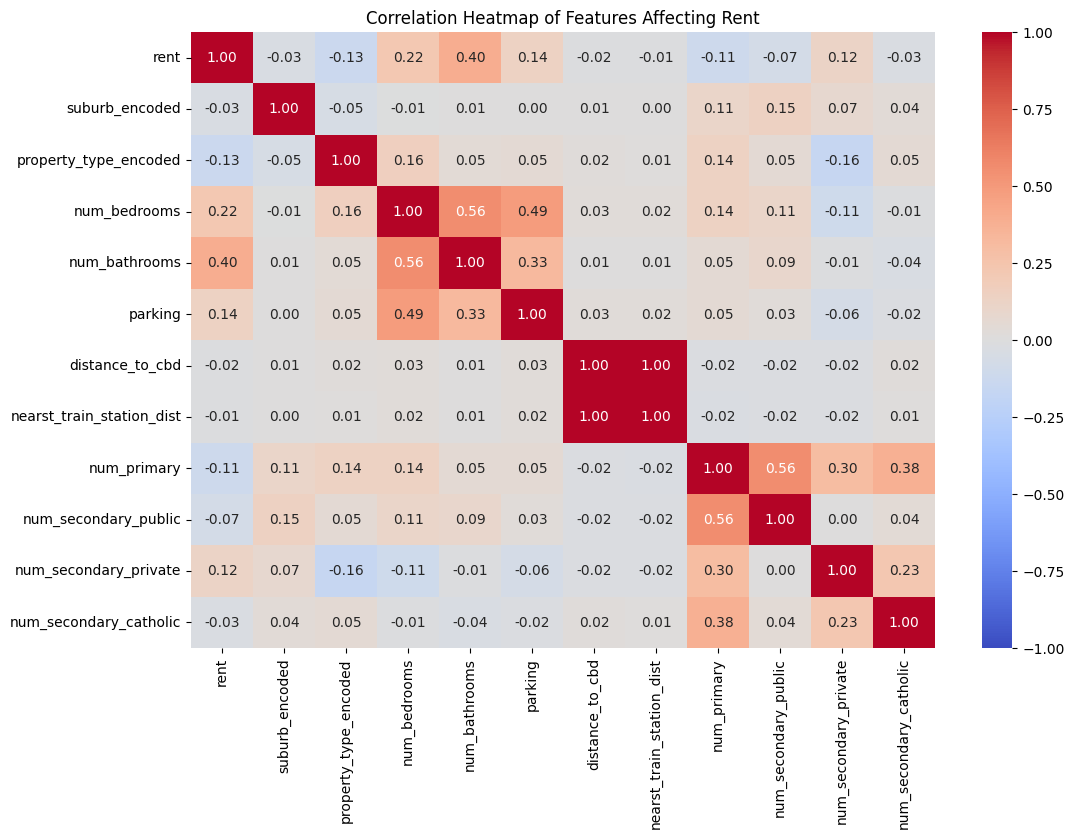

In [49]:
# Correlation heatmap
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np

data = df_house_lite

# Encoding the categorical col
le_suburb = LabelEncoder()
le_property_type = LabelEncoder()

data['suburb_encoded'] = le_suburb.fit_transform(data['suburb'])
data['property_type_encoded'] = le_property_type.fit_transform(data['property_type'])

# Select relevant columns to analysis
columns_to_analyze = [
    'rent', 'suburb_encoded', 'property_type_encoded', 'num_bedrooms', 
    'num_bathrooms', 'parking', 'distance_to_cbd', 'nearst_train_station_dist', 
    'num_primary', 'num_secondary_public', 'num_secondary_private', 'num_secondary_catholic'
]

# Correlation matrix
corr_matrix = data[columns_to_analyze].corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features Affecting Rent')
plt.show()


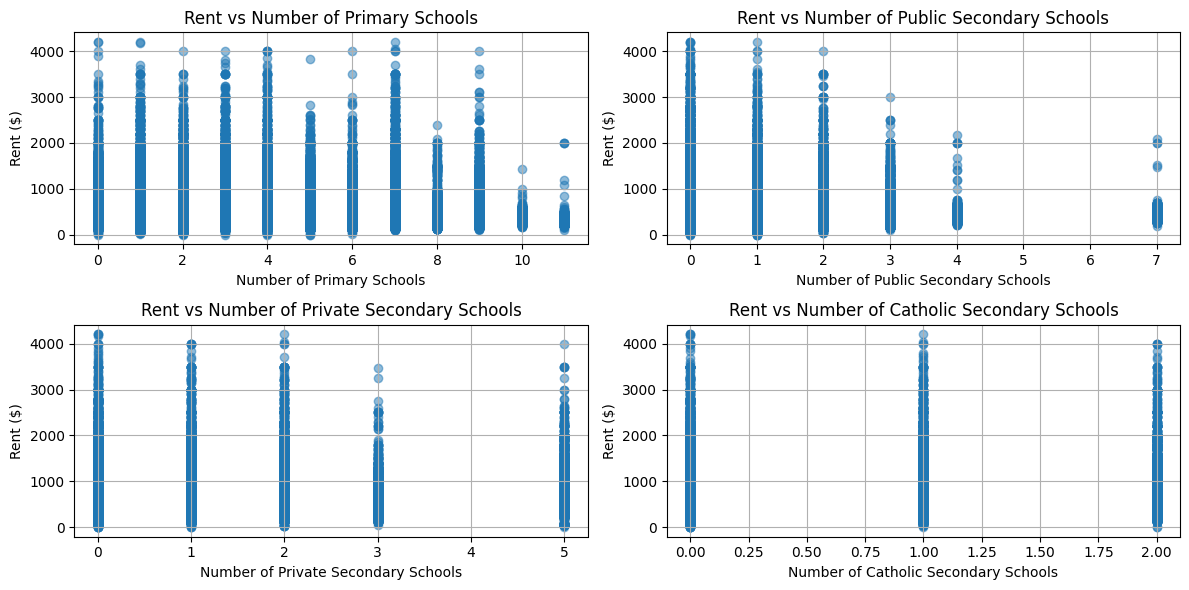

num_primary              -0.111222
num_secondary_public     -0.070512
num_secondary_private     0.117949
num_secondary_catholic   -0.030048
Name: rent, dtype: float64

In [50]:
# Scatter plot for number of nearby primary schools vs rent
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(data['num_primary'], data['rent'], alpha=0.5)
plt.title('Rent vs Number of Primary Schools')
plt.xlabel('Number of Primary Schools')
plt.ylabel('Rent ($)')
plt.grid(True)

# Scatter plot for number of nearby public secondary schools vs rent
plt.subplot(2, 2, 2)
plt.scatter(data['num_secondary_public'], data['rent'], alpha=0.5)
plt.title('Rent vs Number of Public Secondary Schools')
plt.xlabel('Number of Public Secondary Schools')
plt.ylabel('Rent ($)')
plt.grid(True)

# Scatter plot for number of nearby private secondary schools vs rent
plt.subplot(2, 2, 3)
plt.scatter(data['num_secondary_private'], data['rent'], alpha=0.5)
plt.title('Rent vs Number of Private Secondary Schools')
plt.xlabel('Number of Private Secondary Schools')
plt.ylabel('Rent ($)')
plt.grid(True)

# Scatter plot for number of nearby catholic secondary schools vs rent
plt.subplot(2, 2, 4)
plt.scatter(data['num_secondary_catholic'], data['rent'], alpha=0.5)
plt.title('Rent vs Number of Catholic Secondary Schools')
plt.xlabel('Number of Catholic Secondary Schools')
plt.ylabel('Rent ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Display the correlations for schools vs rent
school_columns = ['num_primary', 'num_secondary_public', 'num_secondary_private', 'num_secondary_catholic']
school_corr = data[school_columns + ['rent']].corr()['rent'].drop('rent')
school_corr
